In [14]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('hiring.csv')

In [16]:
df.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [17]:
df.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [18]:
df['experience']=df['experience'].replace({'five':5,'two':2,'seven':7,'three':3,'eleven':11,'ten':10})

In [19]:
df.dtypes

experience                    float64
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [20]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [21]:
df['experience'].fillna(0,inplace=True)
# When inplace = True is used, it performs operation on data and nothing is returned.

In [22]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [23]:
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(),inplace=True)

In [24]:
df.shape

(8, 4)

In [25]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [27]:
X_train.shape

(6, 3)

In [28]:
X_test.shape

(2, 3)

In [29]:

regressor=LinearRegression()

In [30]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
regressor.score(X_test,y_test)*100

85.97238632433391

In [14]:
print("Intecept of Line is ",regressor.intercept_)

Intecept of Line is  9355.614024714756


In [18]:
for idx,column in enumerate (X_train.columns):
    print("Slope of {} is {}".format(column,regressor.coef_[idx]))

Slope of experience is 2743.2625790811785
Slope of test_score(out of 10) is 2824.91574528469
Slope of interview_score(out of 10) is 2222.3398174973863


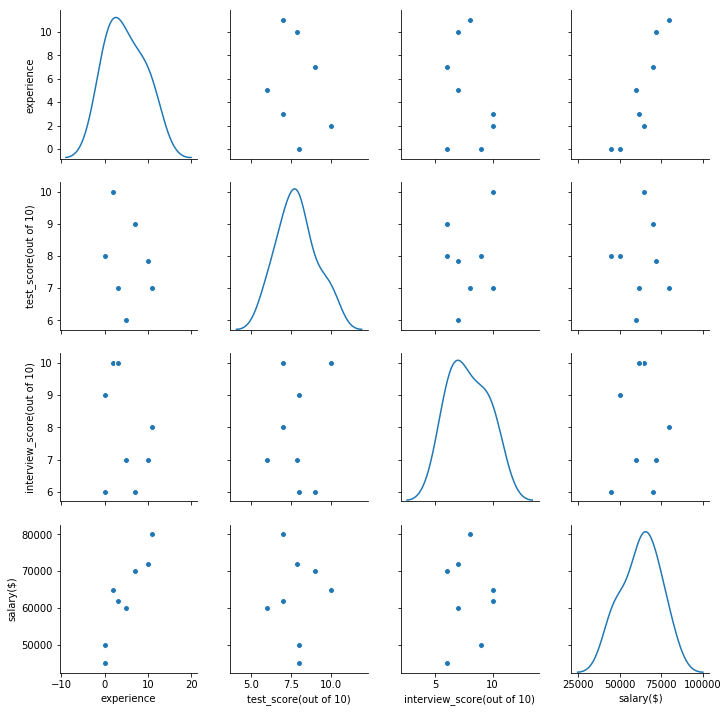

In [25]:
#importing seaborn for statistical plots
import seaborn as sns
sns.pairplot(df , diag_kind = 'kde')

In [13]:
# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))
